In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import csv
import os 
import seaborn as sns
from astropy.time import Time
from astropy import time
from poliastro.twobody.orbit import Orbit
from poliastro.bodies import Earth
from poliastro.plotting import OrbitPlotter
from poliastro.neos import neows
from astropy import units as u
from astropy.coordinates import solar_system_ephemeris
solar_system_ephemeris.set("jpl")

from poliastro.bodies import *
from poliastro.twobody import Orbit
from poliastro.plotting import OrbitPlotter, plot

import gmplot

%matplotlib inline

In [6]:
orbital_df = pd.read_csv("./CSVs/full_orbital_data.csv")
neo_df = pd.read_csv('./CSVs/neo.csv')
recent_df = pd.read_csv('./CSVs/this_week_hazard.csv')
impacts_df = pd.read_csv('./CSVs/cneos_fireball_data.csv')
prob_df = pd.read_csv('./CSVs/cneos_sentry_summary_data.csv')

In [3]:
api_key = ""

In [7]:
neo_df.sort_values(by='Asteroid_name', ascending=False).head()

,Unnamed: 0,Asteroid_name,Closest_Date,Distance_in_100000_miles,Max_Size_Miles,Min_Size_Miles,Potential_Danger,Relative_Velocity_MPH
639,639,431394 (2007 FS35),2159-11-17,87.379180,0.464934,0.207925,False,20314.200016
638,638,431394 (2007 FS35),2113-12-23,18.918459,0.464934,0.207925,False,17043.739766
30,30,431394 (2007 FS35),2113-12-23,18.918459,0.464934,0.207925,False,17043.739766
31,31,431394 (2007 FS35),2159-11-17,87.379180,0.464934,0.207925,False,20314.200016
637,637,397237 (2006 KZ112),2042-04-25,84.223040,1.688072,0.754929,False,116251.901049


In [8]:
orbital_df["Asteroid Name"] = orbital_df['Asteroid Name'].str.replace(r"(","")
orbital_df["Asteroid Name"] = orbital_df['Asteroid Name'].str.replace(r")","")

In [9]:
orbital_df.head()

,Asteroid Name,Aphelion Distance (AU),Eccentricity,Inclination (Degrees),Orbit ID,Orbit Uncertainty,Orbital Period,Perihelion Distance (AU),Aphelion Distance (miles),Perihelion Distance (miles)
0,2002 CB26,3.364498,0.723022,6.818846,8,9,996.6,0.540846,3.127496e+08,5.027481e+07
1,2002 SN,2.686068,0.377997,6.425275,20,5,994.0,1.212443,2.496856e+08,1.127036e+08
2,2000 WJ107,3.033096,0.558187,5.993291,12,7,992.0,0.860013,2.819438e+08,7.994321e+07
3,1998 VP,2.865972,0.475391,44.706727,12,9,988.9,1.019063,2.664088e+08,9.472781e+07
4,1995 CS,3.446606,0.775217,2.602908,12,9,988.1,0.436418,3.203820e+08,4.056760e+07


In [10]:
recent_df.sort_values(by='Closest_Date', ascending=False)

,Unnamed: 0,Asteroid_name,Closest_Date,Closest_Point_(100K_miles),Diameter_Size_(miles),Potential_Danger
4,43,(2004 FU4),2017-11-14,279.80050,0.361332,True
5,45,455176 (1999 VF22),2017-11-14,313.48338,0.125287,True
6,47,497117 (2004 FU4),2017-11-14,279.80050,0.361332,True
3,39,(2014 HQ124),2017-11-13,369.85112,0.274098,True
1,34,(2014 FO47),2017-11-12,389.37272,0.143849,True
2,35,(2015 JA2),2017-11-12,344.72100,0.104209,True
0,24,444193 (2005 SE71),2017-11-11,437.97428,0.378361,True


In [47]:


impacts2_df = impacts_df.drop(impacts_df.index[[152]])
impacts2_df.sort_values(by='Calculated Total Impact Energy (kt)', ascending=False)

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
222,2010-12-25 23:24:00,38.0N,158.0E,26.0,18.1,18.0,-2.0,-4.0,2.000000e+13,33.000
266,2009-10-08 02:57:00,4.2S,120.6E,19.1,19.2,14.0,-16.0,-6.0,2.000000e+13,33.000
719,1994-02-01 22:38:09,2.7N,164.1E,NaN,NaN,NaN,NaN,NaN,1.820000e+13,30.000
434,2004-10-07 13:14:43,27.3S,71.5E,35.0,19.2,-15.3,1.0,11.6,1.040000e+13,18.000
259,2009-11-21 20:53:00,22.0S,29.2E,38.0,32.1,3.0,-17.0,-27.0,1.000000e+13,18.000
346,2006-12-09 06:31:12,26.2N,26.0E,26.5,15.9,4.9,-15.0,1.6,7.410000e+12,14.000
240,2010-07-06 23:54:43,34.1S,174.5W,26.0,15.7,12.1,10.0,0.2,7.560000e+12,14.000
724,1988-04-15 03:03:10,4.1S,124.3E,NaN,NaN,NaN,NaN,NaN,7.580000e+12,14.000
437,2004-09-03 12:07:22,67.7S,18.2E,31.5,NaN,NaN,NaN,NaN,7.260000e+12,13.000
53,2016-02-06 13:55:09,30.4S,25.5W,31.0,15.6,2.7,14.5,5.0,6.853000e+12,13.000


In [16]:
prob_df.drop(['Torino Scale (max.)'], axis=1, inplace=True)
prob_df.describe()
prob_df.corr()



,Potential Impacts,Impact Probability (cumulative),Vinfinity (km/s),H (mag),Estimated Diameter (km),Palermo Scale (cum.),Palermo Scale (max.)
Potential Impacts,1.000000,-0.046144,-0.385714,-0.200258,0.326399,0.342799,0.182502
Impact Probability (cumulative),-0.046144,1.000000,-0.055934,-0.006377,0.009427,0.382608,0.403961
Vinfinity (km/s),-0.385714,-0.055934,1.000000,-0.061651,0.011212,0.003044,0.094685
H (mag),-0.200258,-0.006377,-0.061651,1.000000,-0.851121,-0.518881,-0.520091
Estimated Diameter (km),0.326399,0.009427,0.011212,-0.851121,1.000000,0.621617,0.601761
Palermo Scale (cum.),0.342799,0.382608,0.003044,-0.518881,0.621617,1.000000,0.967950
Palermo Scale (max.),0.182502,0.403961,0.094685,-0.520091,0.601761,0.967950,1.000000


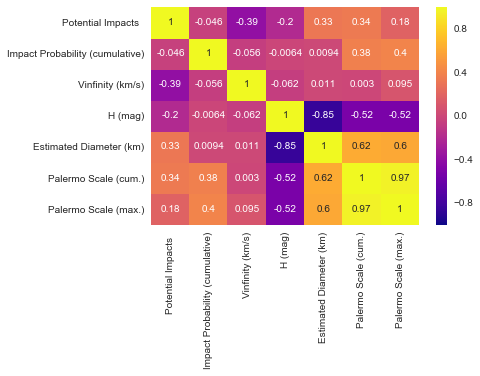

In [23]:
finding_correlations = sns.heatmap(prob_df.corr(), annot=True, cmap=plt.cm.plasma)
plt.savefig('finding_corr.png')

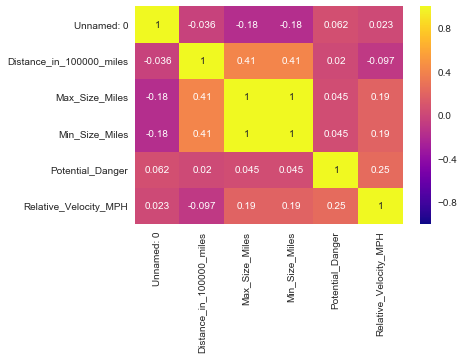

In [24]:
finding_correlations = sns.heatmap(neo_df.corr(), annot=True, cmap=plt.cm.plasma)

In [36]:
prob_df.keys()

Index(['Object Designation  ', 'Year Range  ', 'Potential Impacts  ',
       'Impact Probability (cumulative)', 'Vinfinity (km/s)', 'H (mag)',
       'Estimated Diameter (km)', 'Palermo Scale (cum.)',
       'Palermo Scale (max.)', 'Unnamed: 10'],
      dtype='object')

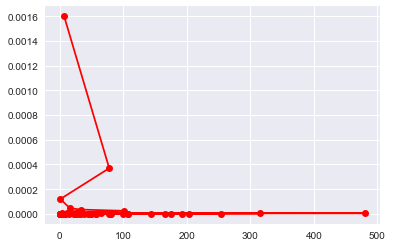

In [38]:
plt.plot(prob_df['Potential Impacts  '], prob_df['Impact Probability (cumulative)'], marker="o", color="r")

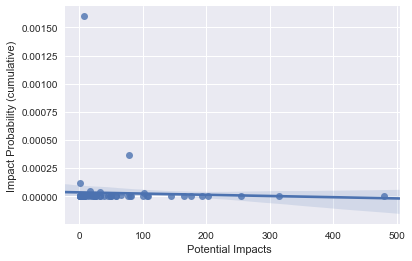

In [40]:
prob_plot = sns.regplot(prob_df['Potential Impacts  '], prob_df['Impact Probability (cumulative)'])
plt.savefig('prob_plot.png')

In [ ]:
#for name in orbital_df['Asteroid Name']:
#    try:
#        asteroids = neows.orbit_from_name('%s' % name, api_key )
#        earth = Orbit.from_body_ephem(Earth)
    
#        frame = OrbitPlotter()
#        frame.plot(asteroids, label=name)
#        frame.plot(earth, label='earth')
#    except:
#        continue 
    

/Users/jayklein95/anaconda/envs/PythonData/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [ ]:
EPOCH = Time("2017-11-14 00:00:00.000", scale="tdb")


asteroid1 = neows.orbit_from_name('2004 FU4', api_key)
asteroid2 = neows.orbit_from_name('1999 VF22', api_key)
asteroid3 = neows.orbit_from_name('2014 FO47', api_key)
asteroid4 = neows.orbit_from_name('2014 HQ124', api_key)
asteroid5 = neows.orbit_from_name('2015 JA2', api_key)
earth = Orbit.from_body_ephem(Earth, EPOCH)

frame = OrbitPlotter()
orbit_plot = (frame.plot(asteroid1, label=asteroid1),
    frame.plot(asteroid2, label=asteroid2),
    frame.plot(asteroid3, label=asteroid3),
    frame.plot(asteroid4, label=asteroid4),
    frame.plot(asteroid5, label=asteroid5),
    frame.plot(earth, label="Earth"))



In [9]:
EPOCH = Time("2017-11-09 00:00:00.000", scale="tdb")


FU4 = neows.orbit_from_name('2004 FU4', api_key)
FU4.epoch.iso
FU4.inc


<Quantity 23.25405151122925 deg>

In [57]:
#Propagate for Time of Current Earth Epoch 2017-11-14
FU4 = neows.orbit_from_name('2004 FU4', api_key)
FU4_Now = FU4.propagate(103000 * u.min)
FU4_Now.epoch.tdb.iso

VF22 = neows.orbit_from_name('1999 VF22', api_key)
VF22_Now = VF22.propagate(4785000 * u.min)
VF22_Now.epoch.tdb.iso

FO47 = neows.orbit_from_name('2014 FO47', api_key)
FO47_Now = FO47.propagate(103000 * u.min)
FO47_Now.epoch.tdb.iso

HQ124 = neows.orbit_from_name('2014 HQ124', api_key)
HQ124_Now = HQ124.propagate(103000 * u.min)
HQ124_Now.epoch.tdb.iso

JA2 = neows.orbit_from_name('2015 JA2', api_key)
JA2_Now = JA2.propagate(103000 * u.min)
JA2_Now.epoch.tdb.iso

EPOCH = Time("2017-11-10 00:00:00.000", scale="tdb")
earth = Orbit.from_body_ephem(Earth, EPOCH)

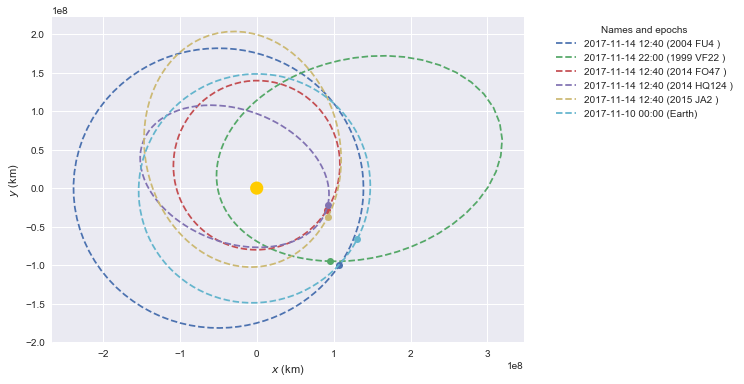

In [58]:
frame = OrbitPlotter()
orbit_plot_now = (frame.plot(FU4_Now, label='2004 FU4 '),
    frame.plot(VF22_Now, label='1999 VF22 '),
    frame.plot(FO47_Now, label='2014 FO47 '),
    frame.plot(HQ124_Now, label='2014 HQ124 '),
    frame.plot(JA2_Now, label='2015 JA2 '),
    frame.plot(earth, label="Earth"))
plt.savefig('orbital_plot_now.png')

In [55]:
#Propagate for Time of Current Earth Epoch 2017-11-14
FU4 = neows.orbit_from_name('2004 FU4', api_key)
FU4_ago = FU4.propagate(57600 * u.min)
FU4_ago.epoch.tdb.iso

VF22 = neows.orbit_from_name('1999 VF22', api_key)
VF22_ago = VF22.propagate(4739100 * u.min)
VF22_ago.epoch.tdb.iso

FO47 = neows.orbit_from_name('2014 FO47', api_key)
FO47_ago = FO47.propagate(57600 * u.min)
FO47_ago.epoch.tdb.iso

HQ124 = neows.orbit_from_name('2014 HQ124', api_key)
HQ124_ago = HQ124.propagate(57600 * u.min)
HQ124_ago.epoch.tdb.iso

JA2 = neows.orbit_from_name('2015 JA2', api_key)
JA2_ago = JA2.propagate(57600 * u.min)
JA2_ago.epoch.tdb.iso

EPOCH = Time("2017-10-14 00:00:00.000", scale="tdb")
earth = Orbit.from_body_ephem(Earth, EPOCH)

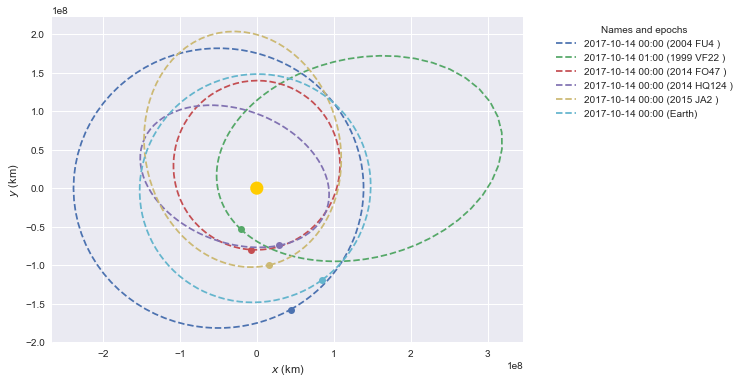

In [56]:
frame = OrbitPlotter()
orbit_plot_ago = (frame.plot(FU4_ago, label='2004 FU4 '),
    frame.plot(VF22_ago, label='1999 VF22 '),
    frame.plot(FO47_ago, label='2014 FO47 '),
    frame.plot(HQ124_ago, label='2014 HQ124 '),
    frame.plot(JA2_ago, label='2015 JA2 '),
    frame.plot(earth, label="Earth"))
plt.savefig('orbit_plot_ago.png')

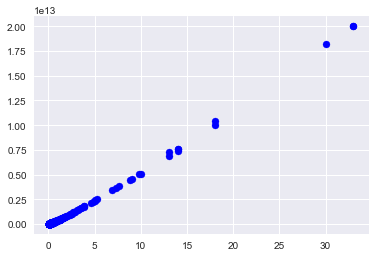

In [48]:
plt.scatter(impacts2_df['Calculated Total Impact Energy (kt)'], 
         impacts2_df['Total Radiated Energy (J)'], 
         marker="o",
        color='b')